# generate feature list
```
python3 gen_feat.py --inf_list toy_imgs/img.list --feat_list toy_imgs/feat.list --resume magface_epoch_00025.pth
```

### Imports and Utility functions

In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
import torch
sns.set(style="white") 
%matplotlib inline

print(torch.cuda.is_available())

def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
def show(idx_):
    imgname = imgnames[idx_]
    img = cv2.imread(imgname)
    imshow(img)
    print(img_2_mag[imgname], imgname)    

True


### Dictionaries with features and magnitudes

In [40]:
with open('toy_imgs/feat.list', 'r') as f:
    lines = f.readlines()

img_2_feats = {} #dictionary of features
img_2_mag = {} #dictionary of magnitudes
for line in lines:
    parts = line.strip().split(' ')
    imgname = parts[0] #image name
    feats = [float(e) for e in parts[1:]] #list with features
    mag = np.linalg.norm(feats) #euclidean norm of the features (one per image)
    img_2_feats[imgname] = feats/mag #normalization
    img_2_mag[imgname] = mag #dictionary with key = image name, value = magnitude of the features


imgnames = list(img_2_mag.keys()) #list of image names extracted from the dictionary
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags)

print(imgnames)

print("_________________________________________________________________________")
print(f"length of dictionary with key = image name, value=[features] {len(img_2_feats)}")
print(f"length of dictionary with key = image name, value=magnitude of the features {len(img_2_mag)}")

['toy_imgs/000001.jpg', 'toy_imgs/000002.jpg', 'toy_imgs/000003.jpg', 'toy_imgs/000004.jpg', 'toy_imgs/000005.jpg', 'toy_imgs/000006.jpg', 'toy_imgs/000007.jpg', 'toy_imgs/000008.jpg', 'toy_imgs/000009.jpg', 'toy_imgs/000010.jpg', 'toy_imgs/000011.jpg', 'toy_imgs/000012.jpg', 'toy_imgs/000013.jpg', 'toy_imgs/000014.jpg', 'toy_imgs/000015.jpg', 'toy_imgs/000016.jpg', 'toy_imgs/000017.jpg', 'toy_imgs/000018.jpg', 'toy_imgs/000019.jpg', 'toy_imgs/000020.jpg', 'toy_imgs/000021.jpg', 'toy_imgs/000022.jpg', 'toy_imgs/000023.jpg', 'toy_imgs/000024.jpg', 'toy_imgs/000025.jpg', 'toy_imgs/000026.jpg', 'toy_imgs/000027.jpg', 'toy_imgs/000028.jpg', 'toy_imgs/000029.jpg', 'toy_imgs/000030.jpg', 'toy_imgs/000031.jpg', 'toy_imgs/000032.jpg', 'toy_imgs/000033.jpg', 'toy_imgs/000034.jpg', 'toy_imgs/000035.jpg', 'toy_imgs/000036.jpg', 'toy_imgs/000037.jpg', 'toy_imgs/000038.jpg', 'toy_imgs/000039.jpg', 'toy_imgs/000040.jpg', 'toy_imgs/000041.jpg', 'toy_imgs/000042.jpg', 'toy_imgs/000043.jpg', 'toy_imgs/

### Correlations

In [41]:
# function to compute correlation between two images based on features
def compute_feature_correlation(feats1, feats2):
    return np.dot(feats1, feats2) / (np.linalg.norm(feats1) * np.linalg.norm(feats2)) # dot product / (norm1 * norm2) -> cosine similarity


#compute average correlation between all the images
def calculate_average_correlation(original_images):
    correlations = []
    
    for i in range(len(original_images)):
        for j in range(i + 1, len(original_images)):
            correlation = compute_feature_correlation(img_2_feats[original_images[i]], img_2_feats[original_images[j]])
            correlations.append(correlation)
    
    return np.mean(correlations), correlations

non_mated_images = list(img_2_mag.keys()) #list of image names extracted from the dictionary
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags)



avg_corr_originals, correlations = calculate_average_correlation(non_mated_images)
print(f"number of correlations computed: {len(correlations)}")
print(f"average of correlations between non-mated images: {avg_corr_originals}")
# Additional statistics
min_corr = np.min(correlations)
max_corr = np.max(correlations)
std_dev_corr = np.std(correlations)
skewness_corr = np.mean((correlations - np.mean(correlations))**3) / (np.std(correlations)**3)

print(f"Minimum correlation: {min_corr}")
print(f"Maximum correlation: {max_corr}")
print(f"Standard deviation of correlations: {std_dev_corr}")
print(f"Skewness of correlations: {skewness_corr}")



number of correlations computed: 19900
average of correlations between non-mated images: 0.09731181023367828
Minimum correlation: -0.21132802741078965
Maximum correlation: 0.5022013613625917
Standard deviation of correlations: 0.08910612876024562
Skewness of correlations: 0.31457748423897985


### Histogram of correlations

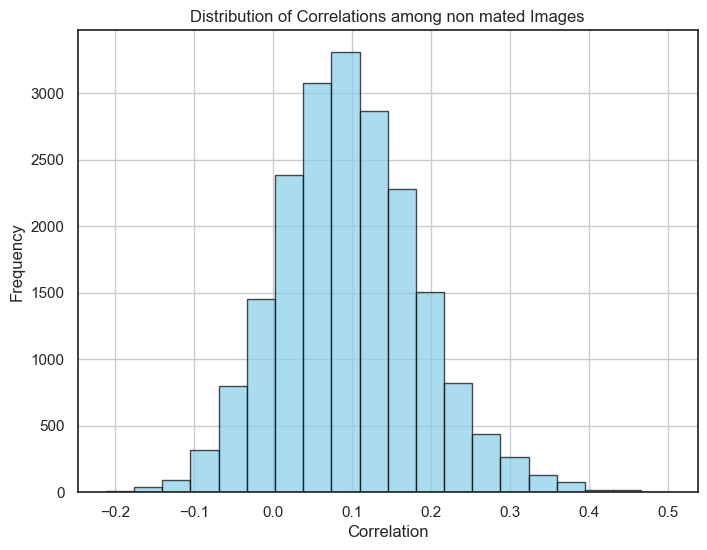

In [46]:
import matplotlib.pyplot as plt

# Plot the histogram of correlations
plt.figure(figsize=(8, 6))
plt.hist(correlations, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Correlations among non mated Images')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




### Save correlations of non mated images

In [44]:
# Write correlations to a text file
with open('C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/output/non_mated_correlations.txt', 'w') as file:
    for correlation in correlations:
        file.write(f"{correlation:.18e}\n")
